In [2]:
import pandas as pd
df = pd.read_excel('data.xls')

In [3]:
display(df.head())

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.043054,0.000000,0.000000,0.000000,0.000000
1,0.047881,-0.004631,0.013137,-0.005856,0.015110
2,0.052708,-0.037907,0.047012,0.009021,0.061061
3,0.057535,-0.076528,0.035190,0.060995,0.103997
4,0.062363,-0.106679,-0.004534,0.139590,0.175745


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
trans = df.to_numpy()

In [6]:
for i in range(10):
    print(trans[i][1:4:])

[0. 0. 0.]
[-0.00463051  0.01313686 -0.00585568]
[-0.03790692  0.04701233  0.00902092]
[-0.07652813  0.03518963  0.06099534]
[-0.10667917 -0.00453377  0.13958967]
[-0.08634241  0.00593472  0.15568709]
[-0.06519276  0.01497078  0.0945344 ]
[-0.033419    0.02310562 -0.00470698]
[ 0.01768083  0.0136404  -0.11185658]
[ 0.05947263 -0.01841068 -0.21819961]


In [7]:
axis = [[],[],[]]
times_row = []
for i in trans:
    times_row.append(i[0])
    
    axis[0].append(i[1])
    axis[1].append(i[2])
    axis[2].append(i[3])
    

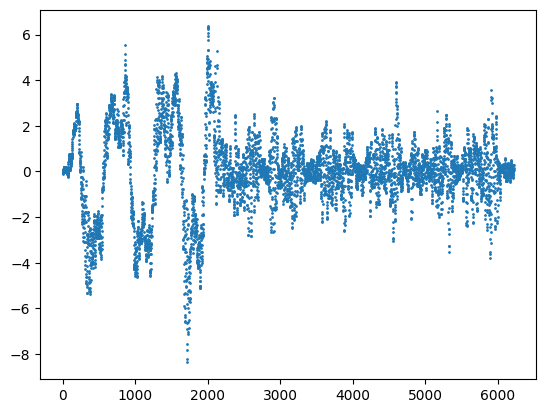

In [11]:
plt.scatter(range(len(axis[0])), axis[0], s=1)

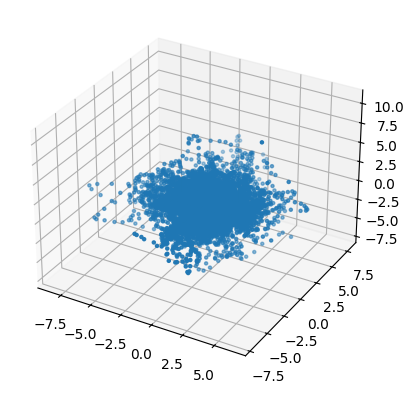

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(axis[0], axis[1], axis[2], marker='.')

In [13]:
def moving_average_cumsum(data, window_size):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0))
    return (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    #return data

In [14]:
filtered_axis = [[],[],[]]

#power_of_filter = 0.04
#window_size = int(len(times_row) * power_of_filter)
window_size = 100

filtered_axis[0] = moving_average_cumsum(axis[0], window_size)
filtered_axis[1] = moving_average_cumsum(axis[1], window_size)
filtered_axis[2] = moving_average_cumsum(axis[2], window_size)

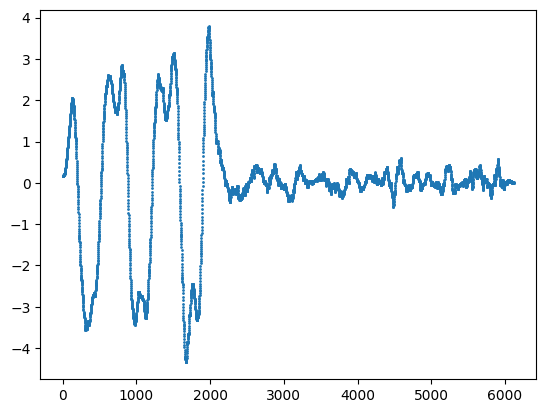

In [15]:
plt.scatter(range(len(filtered_axis[0])), filtered_axis[0],s=1)

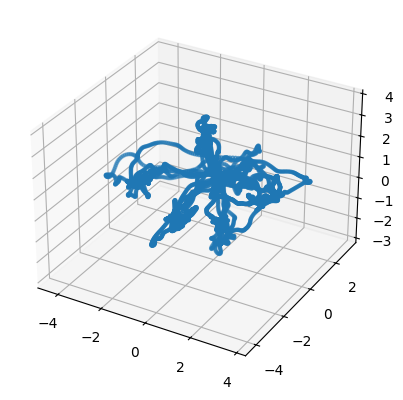

In [16]:
fig_fil = plt.figure()
ax_fil = fig_fil.add_subplot(projection='3d')
ax_fil.scatter(filtered_axis[0], filtered_axis[1], filtered_axis[2], marker='.')

In [17]:
# задержка между измерениями в среднем равна
delta_t = 0.0048272 
#изменениями в 7-ом знаке принебрежем, примем задержку постоянной

In [18]:
x = [0]
y = [0]
z = [0]

for i in range(len(filtered_axis[0])):
    x.append(filtered_axis[0][i] * delta_t**2 *  0.5 + x[i])
    y.append(filtered_axis[1][i] * delta_t**2 *  0.5 + y[i])
    z.append(filtered_axis[2][i] * delta_t**2 *  0.5 + z[i])   

In [19]:
# for i in range(len(x)):
#     z[i] *= -1
#     x[i] *= -1
    

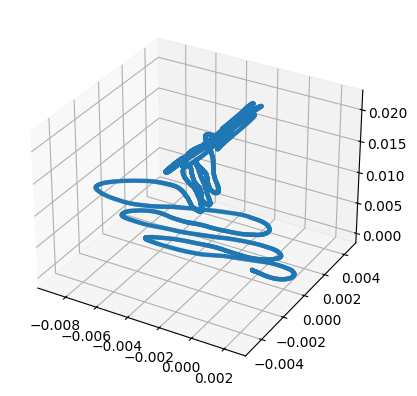

In [20]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y,z, marker='.')

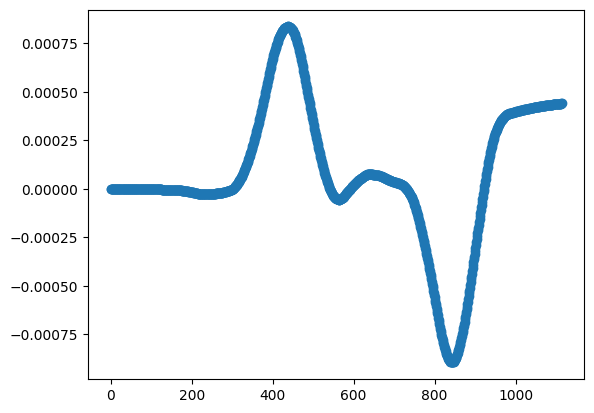

In [17]:
plt.scatter(range(len(x)), x)

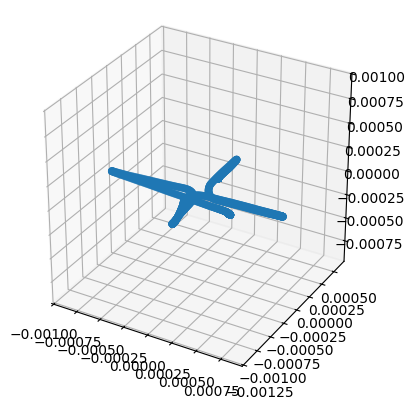

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Use this for matplotlib prior to 3.3.0 only.
#ax.set_aspect("equal")
#
# Use this for matplotlib 3.3.0 and later.
# https://github.com/matplotlib/matplotlib/pull/17515
ax.set_box_aspect([1.0, 1.0, 1.0])



scat = ax.scatter(x, y, z)

set_axes_equal(ax)
plt.show()

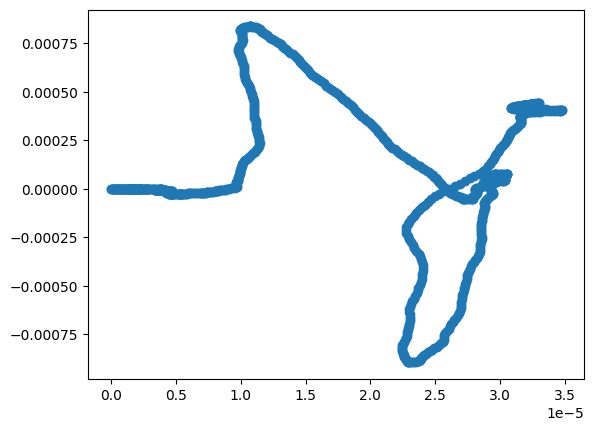

In [19]:
plt.scatter(z, x)